# Phylogeny of some organisms

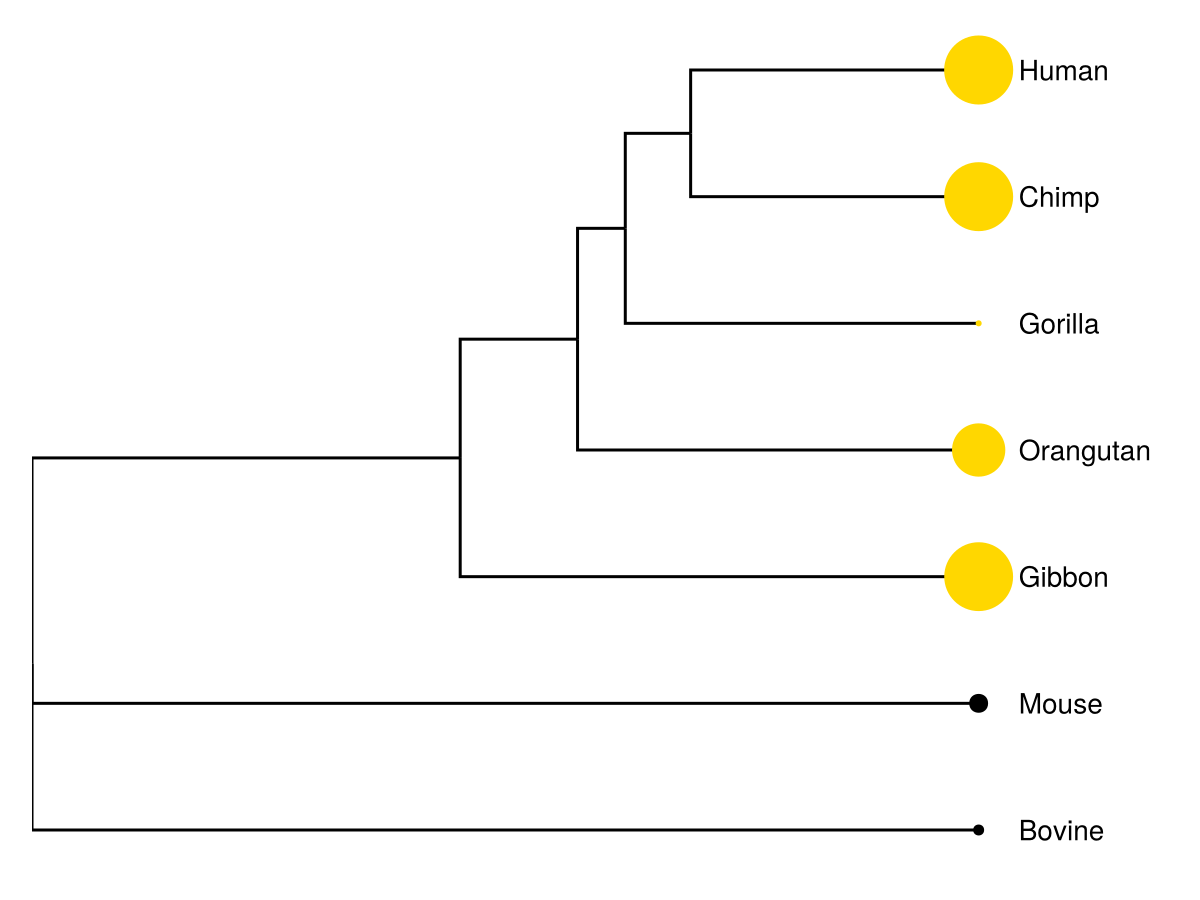

In [1]:
using CairoMakie, NewickTree, BasicTreePlots

tree =
    nw"(Bovine:0.69395,(Gibbon:0.36079,(Orangutan:0.33636,(Gorilla:0.17147,(Chimp:0.19268,Human:0.11927):0.08386):0.06124):0.15057):0.54939,Mouse:1.21460);"

tree = BasicTreePlots.ladderize(tree)


isprimate = Dict(
    "Bovine" => false,
    "Gibbon" => true,
    "Orangutan" => true,
    "Gorilla" => true,
    "Chimp" => true,
    "Human" => true,
    "Mouse" => false,
)
tree_data = Dict(
    node => (; is_primate = get(isprimate, name(node), missing), bananas_ate = 25 * rand()) for
    node in PreOrderDFS(tree)
)

markercolors = map(PreOrderDFS(tree)) do node
    if haskey(isprimate, name(node))
        if tree_data[node].is_primate
            :gold
        else
            :black
        end
    else
        :transparent
    end
end

markersizes = map(PreOrderDFS(tree)) do node
    if haskey(isprimate, name(node))
        if isprimate[name(node)]
            1 + tree_data[node].bananas_ate * 2.0
        else
            1 + tree_data[node].bananas_ate * 0.5
        end
    else
        0
    end
end


fig = Figure()
ax = Axis(fig[1, 1], xautolimitmargin = (0.0, 0.2))
hidedecorations!(ax)
hidespines!(ax)
tp = treeplot!(ax, tree, usemaxdepth = true)
treelabels!(tp; depth = tp.maxtreedepth, labeloffset = 20)
treescatter!(ax, tp, color = markercolors, markersize = markersizes)
fig

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*